# ERA5 Global weather

<b>Table of Contents</b>

- Overview
- Setup
    - Get authentication token
- Data layers
- Querying the data layers
    - Point query
    - Raster query
- References

## Overview

As any reanalysis product, ERA5 combines observed data with the output of meteorological models. Note that there are actually two versions of ERA5 data. Initial data is referred to as ERA5T and available in near real time. I.e., ERA5T data lags real time by about three days. About three months later, the final version of the data is released. This is the actual ERA5 data. This Data Set contains both ERA5 and ERA5T data. With the latter being uploaded initially and overwritten once the former is available. As far as currently known, differences between the two versions are negligible. The Data Set contains data for 1980, 1990, 2000, 2005 and from 2009 onwards.

Let us get a practical understanding about this Data Set and its usage through this tutorial.

## Setup

Before starting, you have to install IBM EI Geospatial python SDK i.e ibmpairs and other modules needed to run this sample, mentioned in the cell below.

<b>Note:</b> To run this notebook seamlessly, you have to first configure your Geospatial APIs' credentials in a file named `secrets.ini` in the below format:

```
[EI]
api.api_key = <Your Geospatial APIs API key>
api.tenant_id = <Your Geospatial APIs Tenant ID>
api.org_id = <Your Geospatial APIs Org ID>
```

Keep the secrets.ini file at an appropriate relative location of this notebook. For example, as specified in the config below.

```config.read('../../../../auth/secrets.ini')```

In [ ]:
%pip install ibmpairs
%pip install configparser
%pip install matplotlib
%pip install ipyplot

In [1]:
import ibmpairs.client as client
import ibmpairs.catalog as catalog
import ibmpairs.query as query
import pandas as pd
import configparser
import json
import numpy as np
from PIL import Image as PILImage
from IPython.display import Image, display
import matplotlib.pyplot as plt
import os
import ipyplot


Now, let us create a client object using the API_KEY, TENANT_ID (or CLIENT_ID) and ORG_ID to create an authenticated HTTP client Authentication token using 'ibmpairs.client' module, to use it in the subsequent steps.

### Get authentication token

In [3]:
config = configparser.RawConfigParser()
config.read('../../../../auth/secrets.ini')
# Best practice is not to include secrets in source code so we read
# an api key, tenant id and org id from a secrets.ini file.
# You could set the credentials in-line here but we don't
# recommend it for security reasons.

EI_API_KEY    = config.get('EI', 'api.api_key')
EI_TENANT_ID  = config.get('EI', 'api.tenant_id') 
EI_ORG_ID     = config.get('EI', 'api.org_id')  

EI_client_v3  = client.get_client(api_key   = EI_API_KEY,
                                    tenant_id = EI_TENANT_ID,
                                    org_id    = EI_ORG_ID,
                                    legacy    = False,
                                    version   = 3
                                   )

2025-01-22 10:58:57 - paw - INFO - The client authentication method is assumed to be OAuth2.
2025-01-22 10:58:57 - paw - INFO - Legacy Environment is False
2025-01-22 10:58:57 - paw - INFO - The authentication api key type is assumed to be IBM EIS, because the api key prefix 'PHX' is present.
2025-01-22 10:58:59 - paw - INFO - Authentication success.
2025-01-22 10:58:59 - paw - INFO - HOST: https://api.ibm.com/geospatial/run/na/core/v3


## Data layers

Let us start by querying the ibmpairs catalog to retrieve the Data Set ID and the Data Layers that form the Data Set.


In [4]:
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)
search_df=catalog.search("ERA5 Global weather")
search_df[['dataset_id','data_layer_id','data_layer_name','data_layer_description_short',
           'data_layer_level','data_layer_type','data_layer_unit','data_set_name','data_set_description_short']]

,dataset_id,data_layer_id,data_layer_name,data_layer_description_short,data_layer_level,data_layer_type,data_layer_unit,data_set_name,data_set_description_short
0,190,49417,100 meter wind towards east,The short name of this parameter (as used in the raw GRIB files) is 100u.,12,Raster,m s-1,ERA5 Global weather,Reanalysis produced by the European Centre for Medium-Range Weather Forecasts (ECMWF) that combines observed data with the output of meteorological models.
1,190,49418,100 meter wind towards north,The short name of this parameter (as used in the raw GRIB files) is 100v.,12,Raster,m s-1,ERA5 Global weather,Reanalysis produced by the European Centre for Medium-Range Weather Forecasts (ECMWF) that combines observed data with the output of meteorological models.
2,190,49419,10 meter wind gust (maximum),The short name of this parameter (as used in the raw GRIB files) is 10fg.,12,Raster,m s-1,ERA5 Global weather,Reanalysis produced by the European Centre for Medium-Range Weather Forecasts (ECMWF) that combines observed data with the output of meteorological models.
3,190,49420,10 meter wind towards east,The short name of this parameter (as used in the raw GRIB files) is 10u.,12,Raster,m s-1,ERA5 Global weather,Reanalysis produced by the European Centre for Medium-Range Weather Forecasts (ECMWF) that combines observed data with the output of meteorological models.
4,190,49421,10 meter wind towards north,The short name of this parameter (as used in the raw GRIB files) is 10v.,12,Raster,m s-1,ERA5 Global weather,Reanalysis produced by the European Centre for Medium-Range Weather Forecasts (ECMWF) that combines observed data with the output of meteorological models.
5,190,49422,Dewpoint,The short name of this parameter (as used in the raw GRIB files) is 2d.,12,Raster,K,ERA5 Global weather,Reanalysis produced by the European Centre for Medium-Range Weather Forecasts (ECMWF) that combines observed data with the output of meteorological models.
6,190,49423,Temperature,The short name of this parameter (as used in the raw GRIB files) is 2t.,12,Raster,K,ERA5 Global weather,Reanalysis produced by the European Centre for Medium-Range Weather Forecasts (ECMWF) that combines observed data with the output of meteorological models.
7,190,49424,Solar radiation (total sky),The short name of this parameter (as used in the raw GRIB files) is fdir.,12,Raster,J m-2,ERA5 Global weather,Reanalysis produced by the European Centre for Medium-Range Weather Forecasts (ECMWF) that combines observed data with the output of meteorological models.
8,190,49434,Mean sea level pressure,The short name of this parameter (as used in the raw GRIB files) is msl.,12,Raster,Pa,ERA5 Global weather,Reanalysis produced by the European Centre for Medium-Range Weather Forecasts (ECMWF) that combines observed data with the output of meteorological models.
9,190,49425,High cloud cover,The short name of this parameter (as used in the raw GRIB files) is hcc.,12,Raster,[0-1],ERA5 Global weather,Reanalysis produced by the European Centre for Medium-Range Weather Forecasts (ECMWF) that combines observed data with the output of meteorological models.



As seen above, the ERA5 Global weather Data Set of ID 190 has sixty two Data Layers. This collection of Data Layers defines atmospheric, ocean-wave and land-surface variations. Each of the Data Layers are identified by a unique Data Layer ID. To gain a better understanding of the Data Set and its geospatial and temporal coverage as well as other relevant metadata, we can make further queries to the ibmpairs catalog submodule as mentioned in the [tutorials](https://ibm.github.io/ibmpairs/tutorials/quickstart/quickstartcatalog.html).

## Querying the data layers

Given the large number of data layers in this data set, we will focus on selecting specific layers of interest for our queries.


### Point query

Next, we shall perform a point query for different locations to observe values for various quantities of the ERA5 Global weather Data Set.


In [5]:
query_result = query.submit(
    {
        "layers": [
            {
              "type": "raster",
              "id": "49417", #100 meter wind towards east
            },
            {
              "type": "raster",
              "id": "49422", #Dewpoint
            },
            {
              "type": "raster",
              "id": "49450", #Soil water
            },
            {
              "type": "raster",
              "id": "49457", #Atmospheric water content
            },
            {
              "type": "raster",
              "id": "49438", #Snowfall
            },
            {
              "type": "raster",
              "id": "49459", #Total precipitation
            },
            {
              "type": "raster",
              "id": "49423", #Temperature
            }
        ],
        "spatial": {
            "type": "point",
            "coordinates": [
                19.4139, -70.3168, 
                13.8753, -60.9865
            ]
        },
        "temporal": {
            "intervals": [
                {
                    "start": "2024-01-15T00:00:00Z",
                    "end": "2024-01-15T05:00:00Z"
                }
            ]
        }
    }, client=EI_client_v3)
# Convert the results to a dataframe
point_df = query_result.point_data_as_dataframe()
point_df['value'] = point_df['value'].apply(lambda x: '{:.6f}'.format(float(x)))
point_df['datetime'] = pd.to_datetime(point_df['timestamp'] , unit='ms', errors = 'coerce')
point_df['datetime'] = point_df['datetime'].dt.strftime('%Y-%m-%dT%H:%M:%SZ')
point_df = point_df.drop(columns=['timestamp'])
point_df

2025-01-22 10:59:36 - paw - INFO - TASK: submit STARTING.
2025-01-22 10:59:40 - paw - INFO - TASK: submit COMPLETED.


,layer_id,layer_name,dataset,longitude,latitude,value,datetime
0,49417,100 meter wind towards east,ERA5 Global weather,-60.9865,13.8753,-7.805864,2024-01-15T00:00:00Z
1,49417,100 meter wind towards east,ERA5 Global weather,-70.3168,19.4139,-5.325238,2024-01-15T00:00:00Z
2,49417,100 meter wind towards east,ERA5 Global weather,-60.9865,13.8753,-8.020209,2024-01-15T01:00:00Z
3,49417,100 meter wind towards east,ERA5 Global weather,-70.3168,19.4139,-4.768282,2024-01-15T01:00:00Z
4,49417,100 meter wind towards east,ERA5 Global weather,-60.9865,13.8753,-8.098746,2024-01-15T02:00:00Z
5,49417,100 meter wind towards east,ERA5 Global weather,-70.3168,19.4139,-4.395384,2024-01-15T02:00:00Z
6,49417,100 meter wind towards east,ERA5 Global weather,-60.9865,13.8753,-8.117522,2024-01-15T03:00:00Z
7,49417,100 meter wind towards east,ERA5 Global weather,-70.3168,19.4139,-4.073376,2024-01-15T03:00:00Z
8,49417,100 meter wind towards east,ERA5 Global weather,-60.9865,13.8753,-8.273262,2024-01-15T04:00:00Z
9,49417,100 meter wind towards east,ERA5 Global weather,-70.3168,19.4139,-3.772628,2024-01-15T04:00:00Z


We see above, that various quantity values are obtained for various Data Layers with their respective locations we queried for. For instance, the locations we queried for Data Layer `Dewpoint` with Data Layer ID as `49422` has a value for 6hrs (hourly values) for the temporal date interval range defined in the query.


### Raster query

Next, we shall make a raster query for a square area and observe the outcome for some of the Data Layers of this Data Set.

In [6]:
era5_result = query.submit_check_status_and_download(
    {
        "publish": True,
        "name": "ERA5 Global weather Raster Query",
        "spatial": {
            "type": "square",
            "coordinates": [47.975, 64.66, 67.806, 103.343]
        },
        "temporal": {
            "intervals": [
                {
                    "start": "2024-01-15T00:00:00Z",
                    "end": "2024-01-15T01:00:00Z"
                }
            ]
        },
        "layers": [
            {
              "type": "raster",
              "id": "49417", #100 meter wind towards east
            },
            {
              "type": "raster",
              "id": "49422", #Dewpoint
            },
            {
              "type": "raster",
              "id": "49450", #Soil water
            },
            {
              "type": "raster",
              "id": "49457", #Atmospheric water content
            },
            {
              "type": "raster",
              "id": "49438", #Snowfall
            },
            {
              "type": "raster",
              "id": "49459", #Total precipitation
            },
            {
              "type": "raster",
              "id": "49423", #Temperature
            }
        ]
    }, client=EI_client_v3)

2025-01-22 11:00:05 - paw - INFO - TASK: submit_check_status_and_download STARTING.
2025-01-22 11:00:07 - paw - INFO - The query was successfully submitted with the id: 1737504000_19807107.
2025-01-22 11:00:08 - paw - INFO - The query 1737504000_19807107 has the status Queued.
2025-01-22 11:00:39 - paw - INFO - The query 1737504000_19807107 has the status Running.
2025-01-22 11:01:10 - paw - INFO - The query 1737504000_19807107 has the status Succeeded.
2025-01-22 11:01:10 - paw - INFO - The query 1737504000_19807107 was successful after checking the status.
2025-01-22 11:01:41 - paw - INFO - The query 1737504000_19807107 has the status Succeeded.
2025-01-22 11:01:41 - paw - INFO - The query 1737504000_19807107 was successful after checking the status.
2025-01-22 11:01:41 - paw - WARNING - The query download folder download was not present on the operating system as either a fixed or relative path. Attempting to create.
2025-01-22 11:01:41 - paw - INFO - The query download folder is se

The query takes a few seconds to complete and downloads the output as a zip file in the /download folder within the same location as this notebook. Now we shall display the resultant tiff using the following utility function.

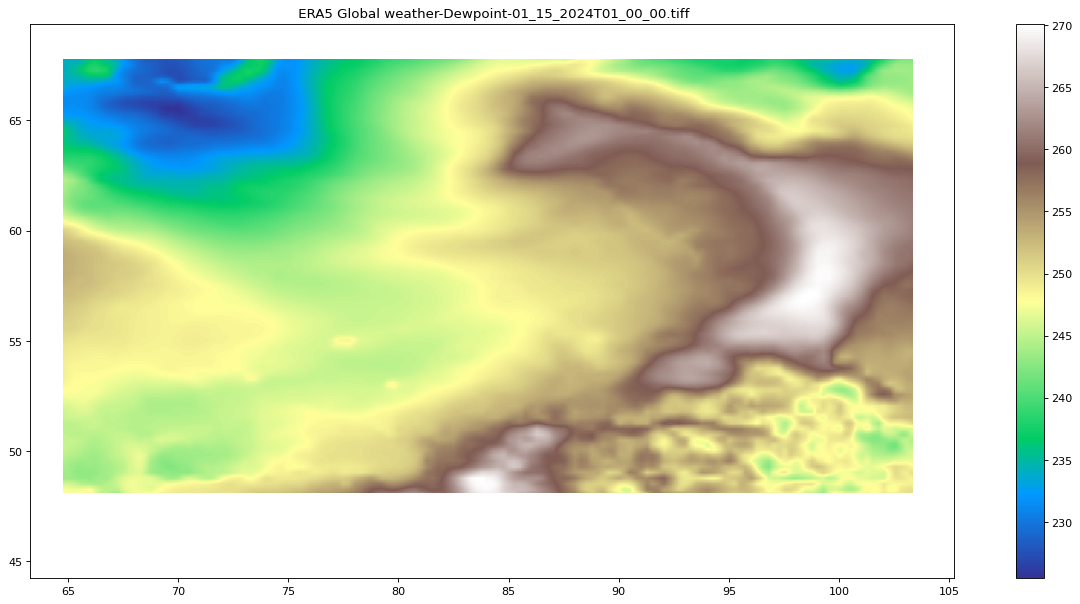

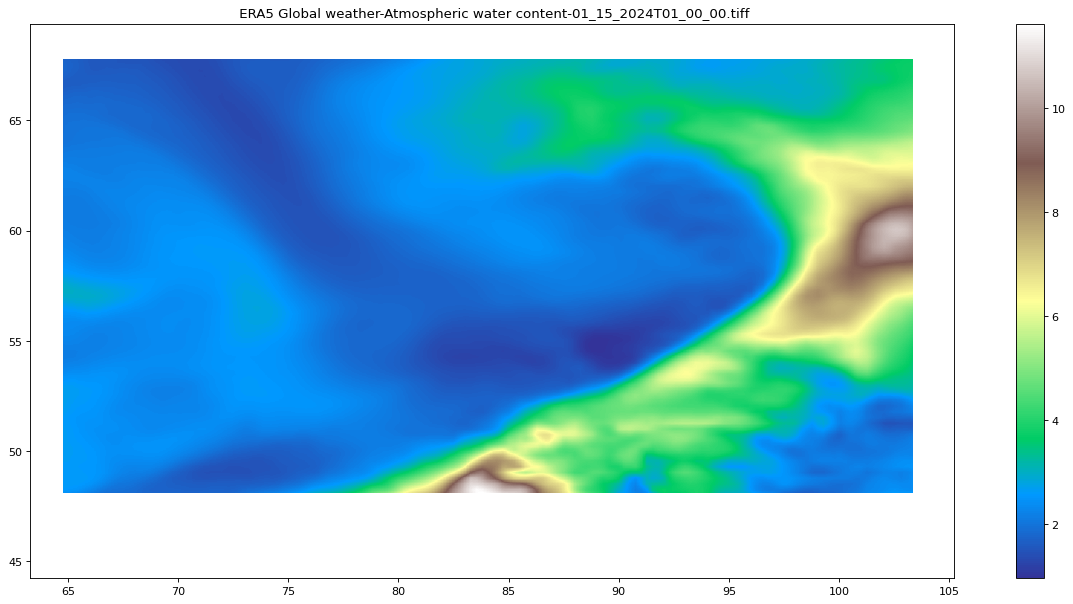

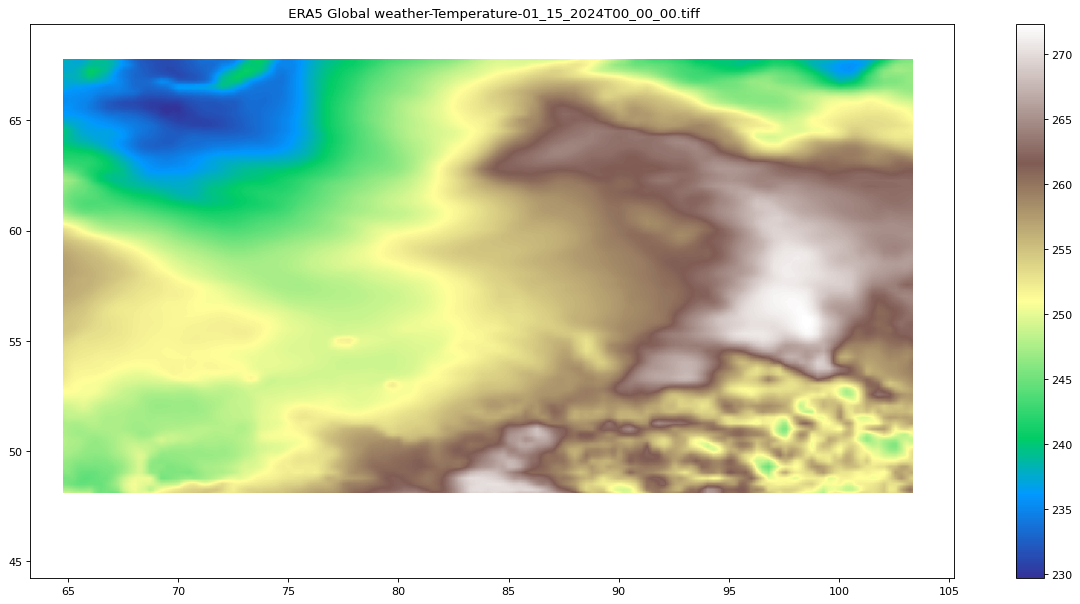

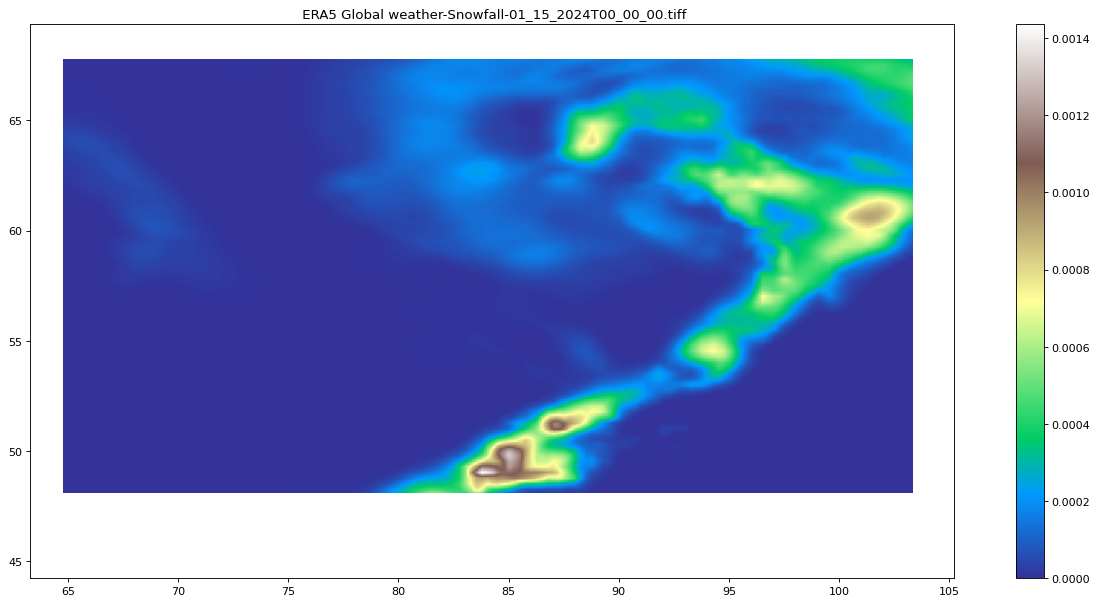

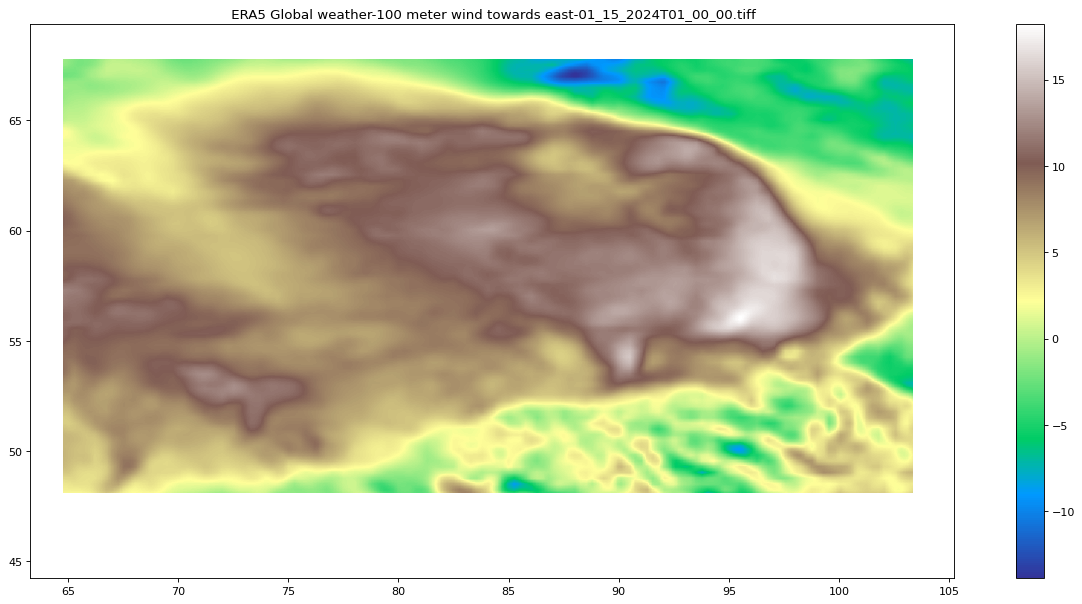

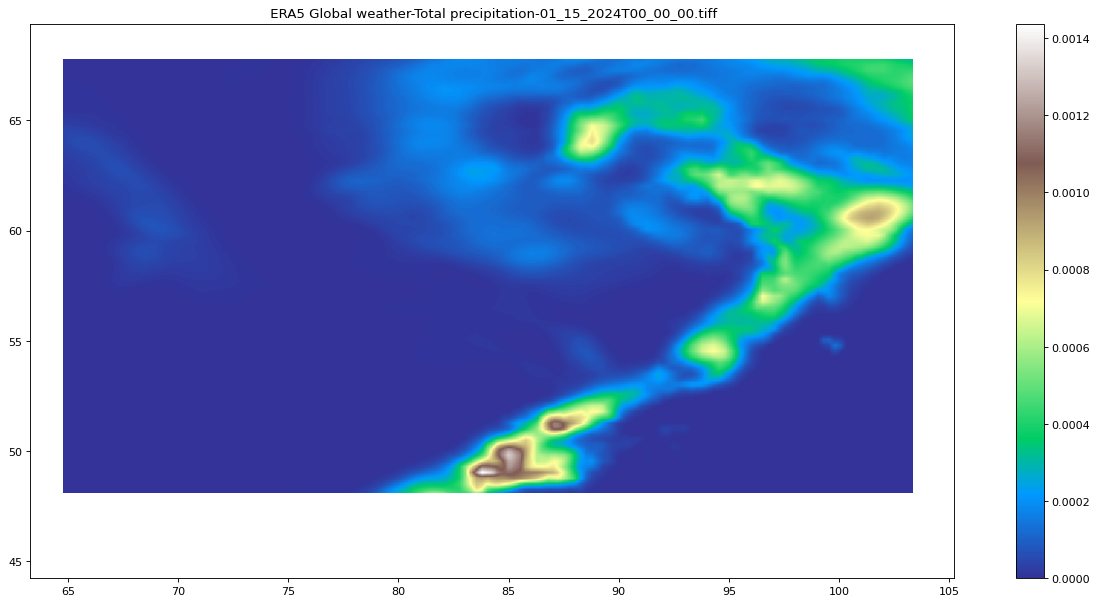

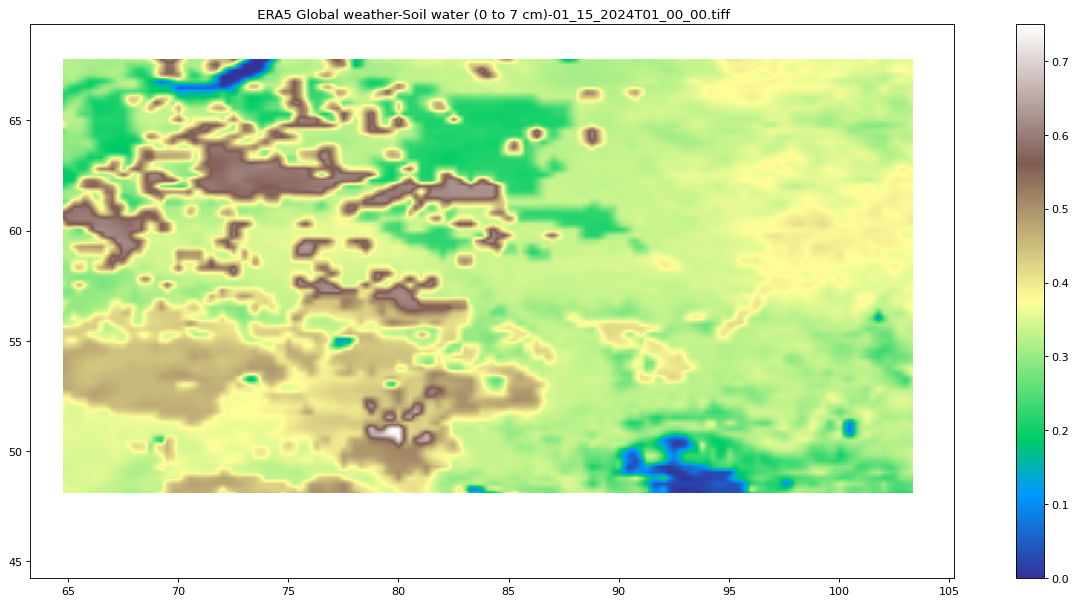

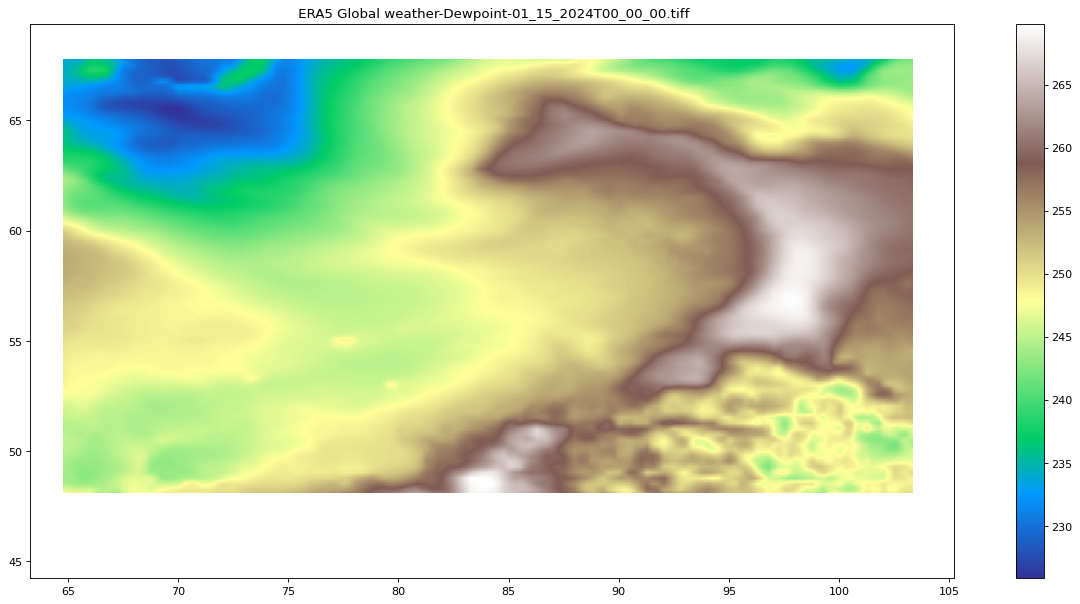

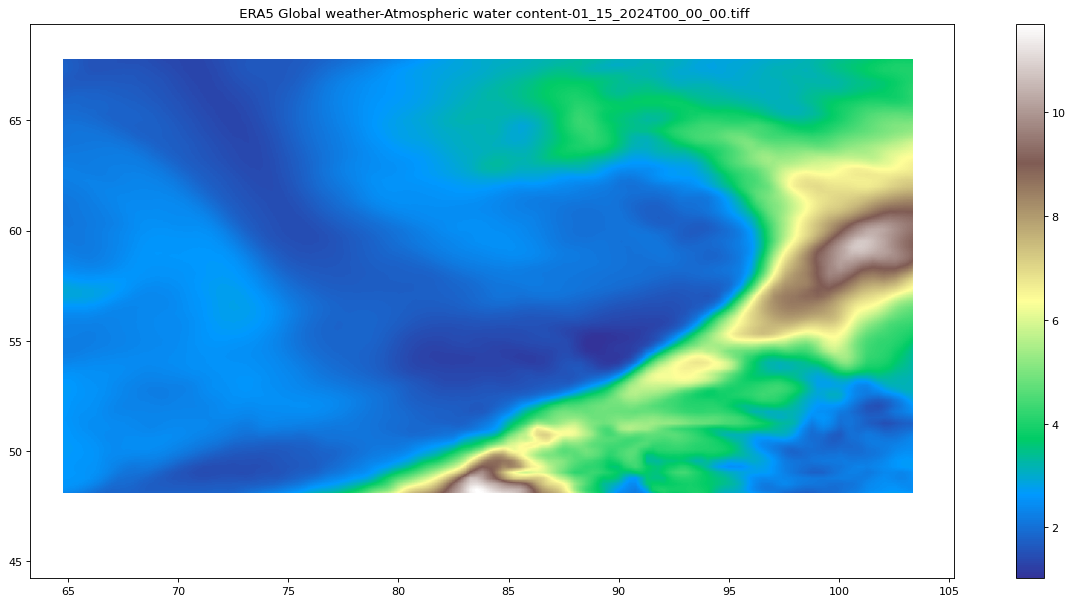

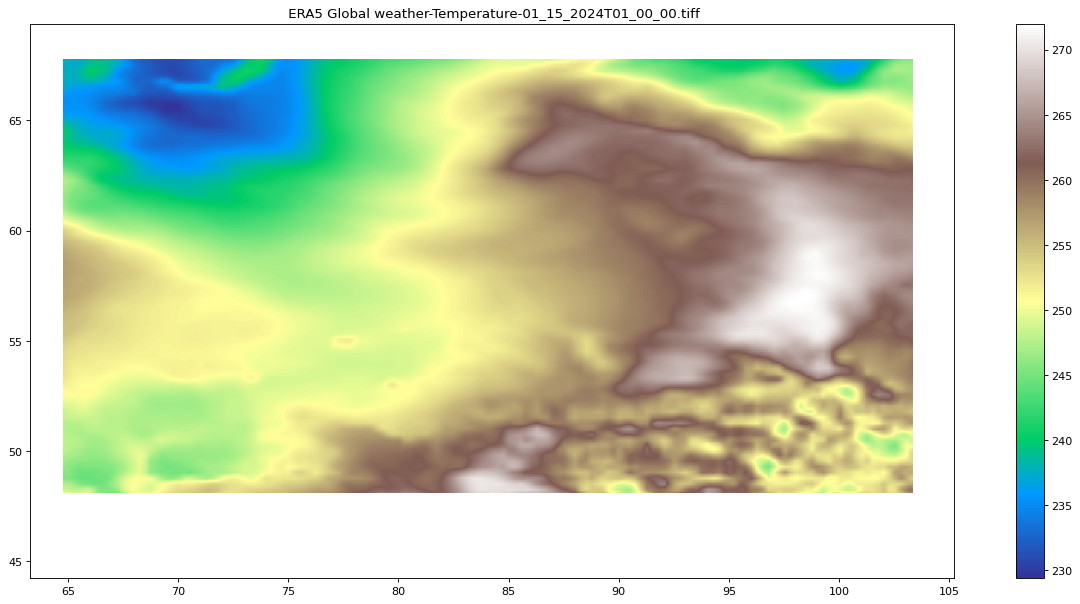

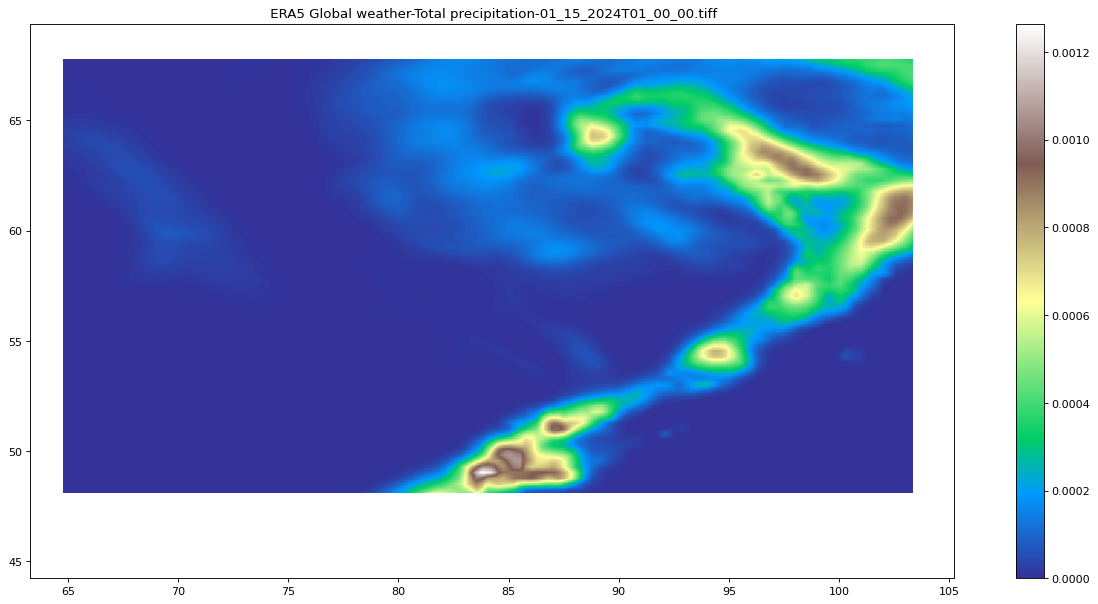

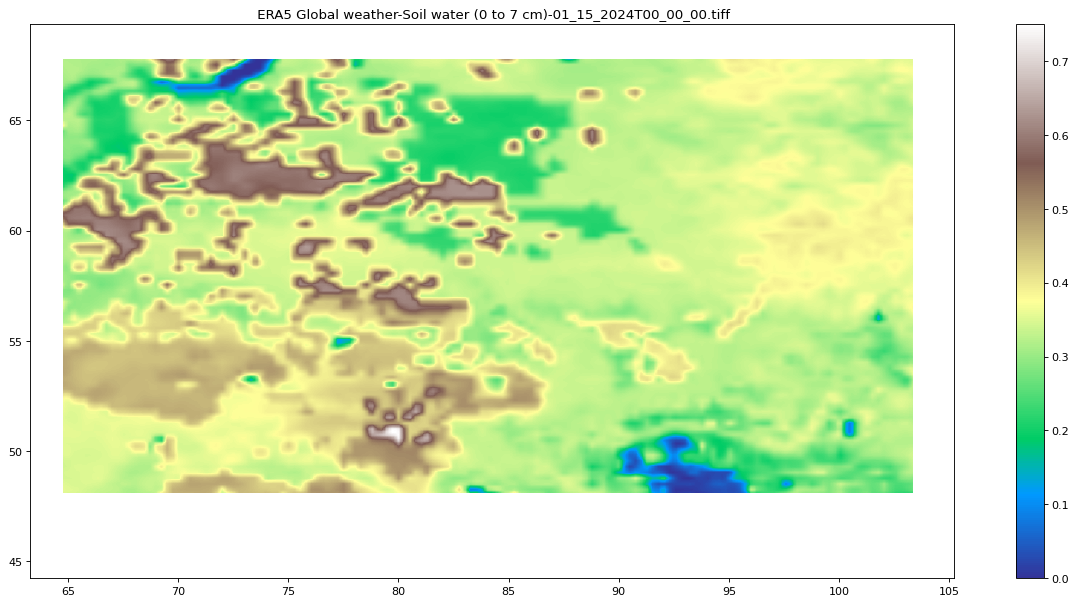

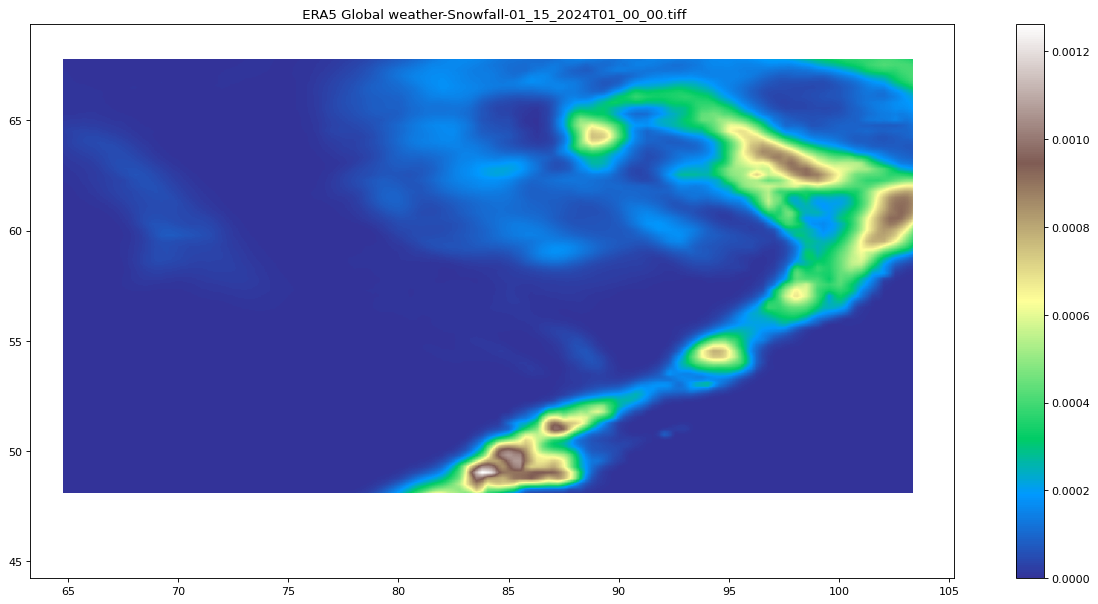

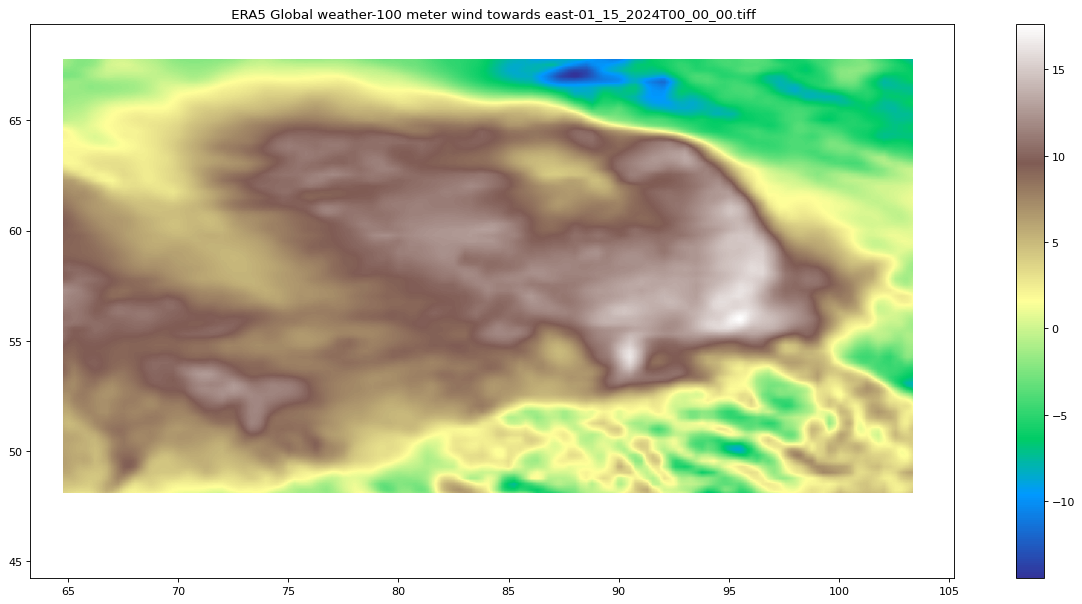

In [7]:
# Function to display the resulting Tiff(s).
era5_file_list = era5_result.list_files()
output_image_array = []
for file in era5_file_list:
    if file.endswith('.tiff'): #display the raster images
        with open(file+'.json', 'r') as summary_file:
            fileparms = json.load(summary_file)
        boundingBox=fileparms["boundingBox"]
        pixelStatistics=fileparms["rasterStatistics"]
        myextent=[boundingBox["minLongitude"],
                  boundingBox["maxLongitude"],
                  boundingBox["minLatitude"],
                  boundingBox["maxLatitude" ] ]  
        array_era5 = np.array(PILImage.open(file))
        mask = (array_era5 == -9999)
        # Masked array to exclude NO Data points from plotting
        masked_array = np.ma.masked_array(array_era5, mask)
        plt.figure(figsize = (20, 9), dpi=80) # Sets the size and resolution of the plot
        plt.imshow(masked_array,
                   cmap = 'terrain', 
                   vmin=pixelStatistics["pixelMin"], 
                   vmax=pixelStatistics["pixelMax"],
                   extent = myextent) # Loads the raster data and sets the colormap
        plt.colorbar() # Adds the color bar
        plt.title(" "+os.path.basename(file)) 
        output_image_path = os.path.splitext(os.path.basename(file))[0] + ".png"
        output_image_array.append(output_image_path)
        # Save the figure
        plt.savefig(output_image_path, bbox_inches='tight')
        plt.close() 

for output_image in output_image_array:
    #display the raster images
    display(Image(output_image,width=800, height=400))    

Each of the images above represents the variations of quantities like Dewpoint, Temperature, Total precipitation and others for the spatial location and temporal period. Each quantity captures information that can be used for different applications like weather monitoring etc.

## References
https://www.ecmwf.int/

https://cds.climate.copernicus.eu/datasets/reanalysis-era5-single-levels

https://en.wikipedia.org/wiki/Meteorological_reanalysis

https://cds.climate.copernicus.eu